In [5]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')

colours = ["#BAE0FF", "#FF5555", "#00A8B3", "#AAAFDF", "#299C21"]

## Traffic Data

In [6]:
import pandas as pd
df = pd.read_csv('../data/traffic3.csv')

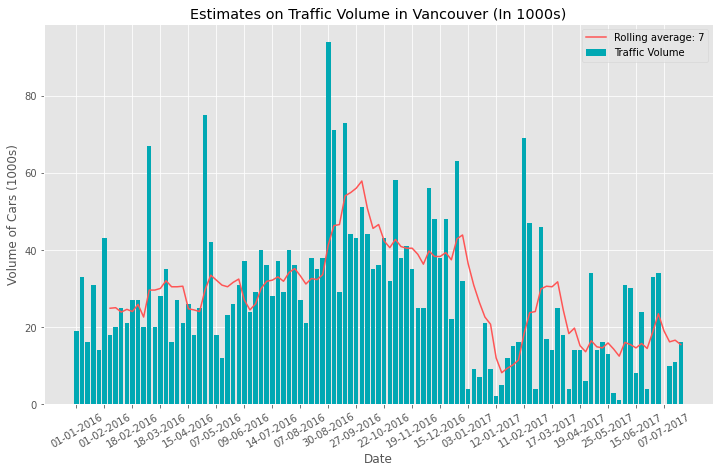

In [7]:
n = len(df)
ticks_to_use = df.date[::5] # Every 20th date
labels = [ i.strip("%Y-%m-%d") for i in ticks_to_use ]
plt.rcParams['figure.figsize'] = [12, 7]
window = 7
rolling_mean = df['count'].rolling(window = window, center=False).mean()

plt.bar(df['date'], df['count'], color=colours[2], label="Traffic Volume") 
plt.xticks(ticks_to_use, labels, rotation=30)
plt.ylabel("Volume of Cars (1000s)")
plt.xlabel("Date")
plt.title("Estimates on Traffic Volume in Vancouver (In 1000s)")
plt.plot(rolling_mean, color=colours[1], label="Rolling average: %i" % window)
plt.legend(loc="upper right")

In [8]:
import pymc3 as pm

alpha = 1.0 / df['count'].mean()

with pm.Model() as model:
    # rate 1
    lambda_1 = pm.Exponential("lambda_1", alpha)
    # rate 2
    lambda_2 = pm.Exponential("lambda_2", alpha)
    # switch point
    tau = pm.DiscreteUniform("tau", lower=0, upper=n)
    # indices
    indices = np.arange(n)
    lambda_ = pm.math.switch(tau >= indices, lambda_1, lambda_2)

In [9]:
with model:
    obs = pm.Poisson("obs", lambda_, observed=df['count'])

In [10]:
with model:
    trace = pm.sample()

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [lambda_2, lambda_1]
>Metropolis: [tau]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.
/usr/local/lib/python3.6/dist-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


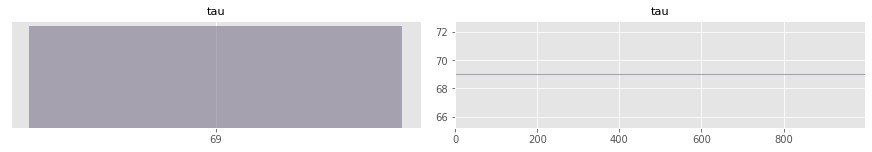

In [11]:
with model:
    pm.plot_trace(trace, var_names=['tau'])

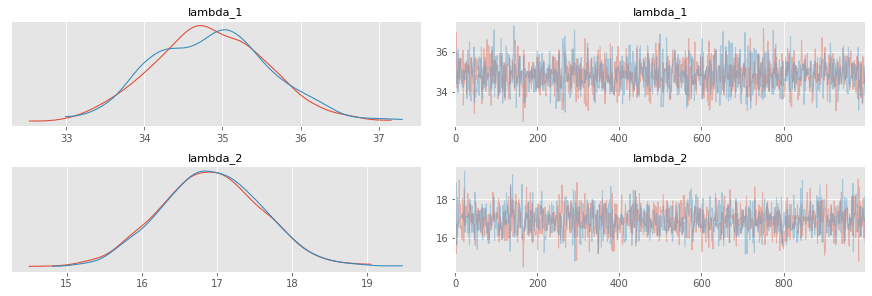

In [12]:
with model:
    pm.plot_trace(trace, var_names=['lambda_1', 'lambda_2'])

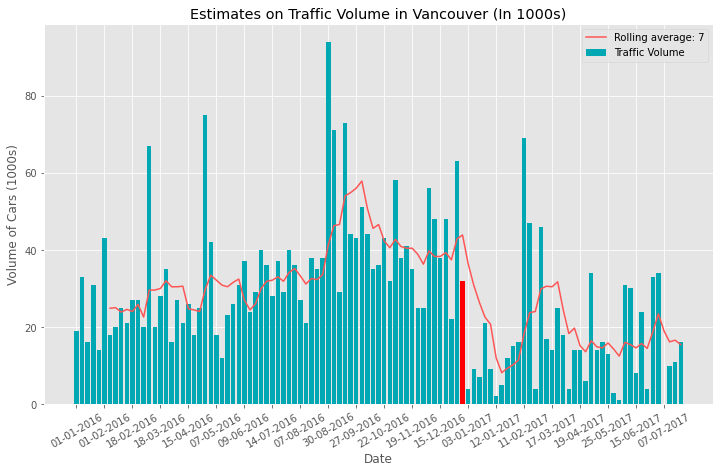

In [13]:
n = len(df)
ticks_to_use = df.date[::5] # Every 20th date
labels = [ i.strip("%Y-%m-%d") for i in ticks_to_use ]
plt.rcParams['figure.figsize'] = [12, 7]
window = 7
rolling_mean = df['count'].rolling(window = window, center=False).mean()

plt.bar(df['date'], df['count'], color=colours[2], label="Traffic Volume")
plt.bar(df['date'][69], df['count'][69], color='red')
plt.bar
plt.xticks(ticks_to_use, labels, rotation=30)
plt.ylabel("Volume of Cars (1000s)")
plt.xlabel("Date")
plt.title("Estimates on Traffic Volume in Vancouver (In 1000s)")
plt.plot(rolling_mean, color=colours[1], label="Rolling average: %i" % window)
plt.legend(loc="upper right")